# Ejercicio 6 - Inferencia de Topicos con EM

### Descripción
* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical más probable dado la letra de una canción. Para ello implementaremos un modelo conocido como Latent Dirichlet Allocation que hace uso de una variante del algoritmo EM para inferir clases latentes a partir de una matriz de documentos.

# Ejercicio 1 - Preparar el ambiente de trabajo

In [11]:
# Librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [4]:
# Lectura de archivos en "dump"

files = glob.glob("dump/*", recursive=True)
li = []

for filename in files:
    df_file = pd.read_csv(filename, index_col=0)
    li.append(df_file)
    #display(os.getcwd())

df = pd.concat(li, ignore_index=True)
df.columns = ["artista", "genero", "cancion", "letra"]
display(df.head())
df.columns = ["artista", "genero", "cancion", "letra"]
display(df.shape)

,artista,genero,cancion,letra
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


(9489, 4)

# Ejercicio 2 - Matriz de Ocurrencias

In [6]:
def vector_a_dataframe(wm, feat_names):
    doc_names = ['Cancion{:d}'.format(idx) for idx, _ in enumrate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names, columns=feat_names)
    return(df)

In [10]:
count_vectorizer = CountVectorizer(stop_words='english')
vector = count_vectorizer.fit_transform(df['letra'])
palabras = count_vectorizer.get_feature_names()
frec_palabras = vector.toarray().sum(axis=0)

data = {'palabra': palabras, 'frecuencia': frec_palabras}

df_5000 = pd.DataFrame(data).sort_values('frecuencia', ascending=False).head(5000).reset_index(drop=True)

df_5000

,palabra,frecuencia
0,like,19629
1,don,17398
2,know,14962
3,got,14171
4,just,13978
...,...,...
4995,crawled,31
4996,absolute,31
4997,thursday,31
4998,tweedle,31


# Ejercicio 3 - Entrenamiento del Modelo

In [12]:
n_componentes =[5,10,15]
learning_decay =[0.7,0.5]

params=[{'n_components':n_componentes,
        'learning_decay':learning_decay,
        'learning_method':['batch','online']
        }]
lda_grid = GridSearchCV(LatentDirichletAllocation(),params,cv=10,n_jobs=-1)
lda_grid.fit(vector)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                       

Mejores Hiperpapametros

In [13]:
lda_grid.best_params_

{'learning_decay': 0.5, 'learning_method': 'online', 'n_components': 5}

In [14]:
df_results = pd.DataFrame(lda_grid.cv_results_)
df_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_decay,param_learning_method,param_n_components,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,85.683734,5.794497,0.796713,0.150371,0.7,batch,5,"{'learning_decay': 0.7, 'learning_method': 'ba...",-1.318394e+06,-1.130612e+06,...,-1.771278e+06,-1.154505e+06,-1.778024e+06,-1.371173e+06,-1.317425e+06,-1.046670e+06,-722125.183657,-1.393471e+06,431849.066107,3
1,86.675191,4.445628,0.849280,0.121972,0.7,batch,10,"{'learning_decay': 0.7, 'learning_method': 'ba...",-1.398977e+06,-1.209271e+06,...,-1.863493e+06,-1.241877e+06,-1.866682e+06,-1.454554e+06,-1.421781e+06,-1.139108e+06,-792857.344137,-1.481113e+06,437293.228119,9
2,87.207133,3.025500,0.957392,0.138912,0.7,batch,15,"{'learning_decay': 0.7, 'learning_method': 'ba...",-1.465663e+06,-1.305300e+06,...,-1.934546e+06,-1.313999e+06,-1.960113e+06,-1.541026e+06,-1.500590e+06,-1.190394e+06,-874870.351042,-1.561424e+06,444901.791879,12
3,62.608977,3.824922,0.555242,0.066410,0.7,online,5,"{'learning_decay': 0.7, 'learning_method': 'on...",-1.300142e+06,-1.116435e+06,...,-1.753941e+06,-1.128208e+06,-1.776287e+06,-1.345499e+06,-1.310561e+06,-1.031216e+06,-706841.554131,-1.377161e+06,431998.770237,2
4,77.118025,4.200996,0.576659,0.064333,0.7,online,10,"{'learning_decay': 0.7, 'learning_method': 'on...",-1.338746e+06,-1.153869e+06,...,-1.797959e+06,-1.172468e+06,-1.811126e+06,-1.399214e+06,-1.352383e+06,-1.079102e+06,-741157.188176,-1.421079e+06,436750.653711,6


# Ejercicio 4 - Inferencia e Identificación de Topicos

In [15]:
fit_best_lda = LatentDirichletAllocation(n_components=5, learning_decay=0.5, learning_method='online')
fit_best_lda.fit(vector);

In [16]:
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    print('-----------')
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras (calculadas en primera parte)
    print(" ".join([palabras[i] for i in topic_name.argsort()[:-15 - 1: -1]]))
    print()

tópico: 1
-----------
like got shit ain nigga niggas yo fuck man don cause real niggaz bitch ass

tópico: 2
-----------
life god death die eyes soul world blood light dead away sun pain time war

tópico: 3
-----------
love don know oh just yeah ll got want ve let like baby come time

tópico: 4
-----------
ya yeah em la know like yo uh don fuck ha rock ah wanna say

tópico: 5
-----------
man like just people black em na better run roll turn money make home old



In [17]:
df['genero'].value_counts()

rock      4140
hiphop    2535
metal     1582
pop       1232
Name: genero, dtype: int64

# Ejercicio 5 - Identificación de Probabilidades

In [18]:
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
# vector calculado en primera parte
fit_best_lda_trans = fit_best_lda.transform(vector)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
                                    # pasamos esta matriz y la redondeamos en 3 decimales
                                    np.round(fit_best_lda_trans, 3),
                                    # agregamos un índice
                                    index=df['letra'].index
                                    )
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, fit_best_lda.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df['artista'],df['letra'], topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1   
concatenated_df.sample(10)

,artista,letra,T: 1,T: 2,T: 3,T: 4,T: 5,highest_topic
5835,Nickelback,This time \n I wonder what it feels like \n To...,0.002,0.001,0.994,0.001,0.001,3
193,A Tribe Called Quest,"Chorus (George Clinton from Funkadelic's ""Let'...",0.368,0.042,0.338,0.107,0.144,1
4536,Meshuggah,"I'm a carnal, organic anagram. human flesh ins...",0.086,0.817,0.002,0.002,0.094,2
6141,Oasis,The people will notice \n That the times are c...,0.003,0.003,0.806,0.003,0.186,3
4175,Led Zeppelin,One-time love \n Take care how you use it \n T...,0.051,0.002,0.494,0.041,0.412,3
5921,Nicki Minaj,"(RedOne...) \n Oh, let's go to the beach, each...",0.035,0.001,0.622,0.203,0.139,3
7623,Rush,I knew he was different in his sexuality \n I ...,0.026,0.438,0.192,0.001,0.342,2
2530,Eminem,"(Intro: Eminem) \n Makaveli, rest in peace \n ...",0.514,0.024,0.108,0.271,0.082,1
6102,Nicki Minaj,"Hi, I'm John Waters, and this is \n The creep....",0.383,0.019,0.134,0.360,0.102,1
2244,Eminem,"Snoop & Dr. Dre \n (Yeah, what up Detroit?) \n...",0.321,0.034,0.228,0.339,0.077,4


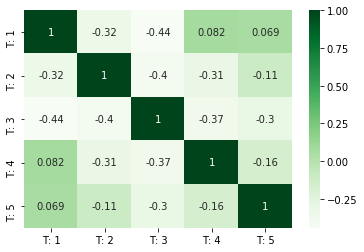

In [20]:
df_topics = concatenated_df.loc[:, 'T: 1':'T: 5']
sns.heatmap(df_topics.corr(), cmap='Greens', annot=True)

Correlaciones mayores son entre T3 y T4 / T3 y T1

In [21]:
# Para el siguiente paso se elige al grupo "deicide"

In [28]:
df_deicide = concatenated_df[df['artista'] == 'Deicide'].loc[:,'T: 1':'T: 5']

means = []

for i, col in df_deicide.iteritems():
    mean = round(np.mean(col), 3)
    means.append(mean)

data = {'topicos': df_deicide.columns, 'probabilidad': means}
df_deicide_mean = pd.DataFrame.from_dict(data)
df_deicide_mean

,topicos,probabilidad
0,T: 1,0.015
1,T: 2,0.833
2,T: 3,0.084
3,T: 4,0.010
4,T: 5,0.058


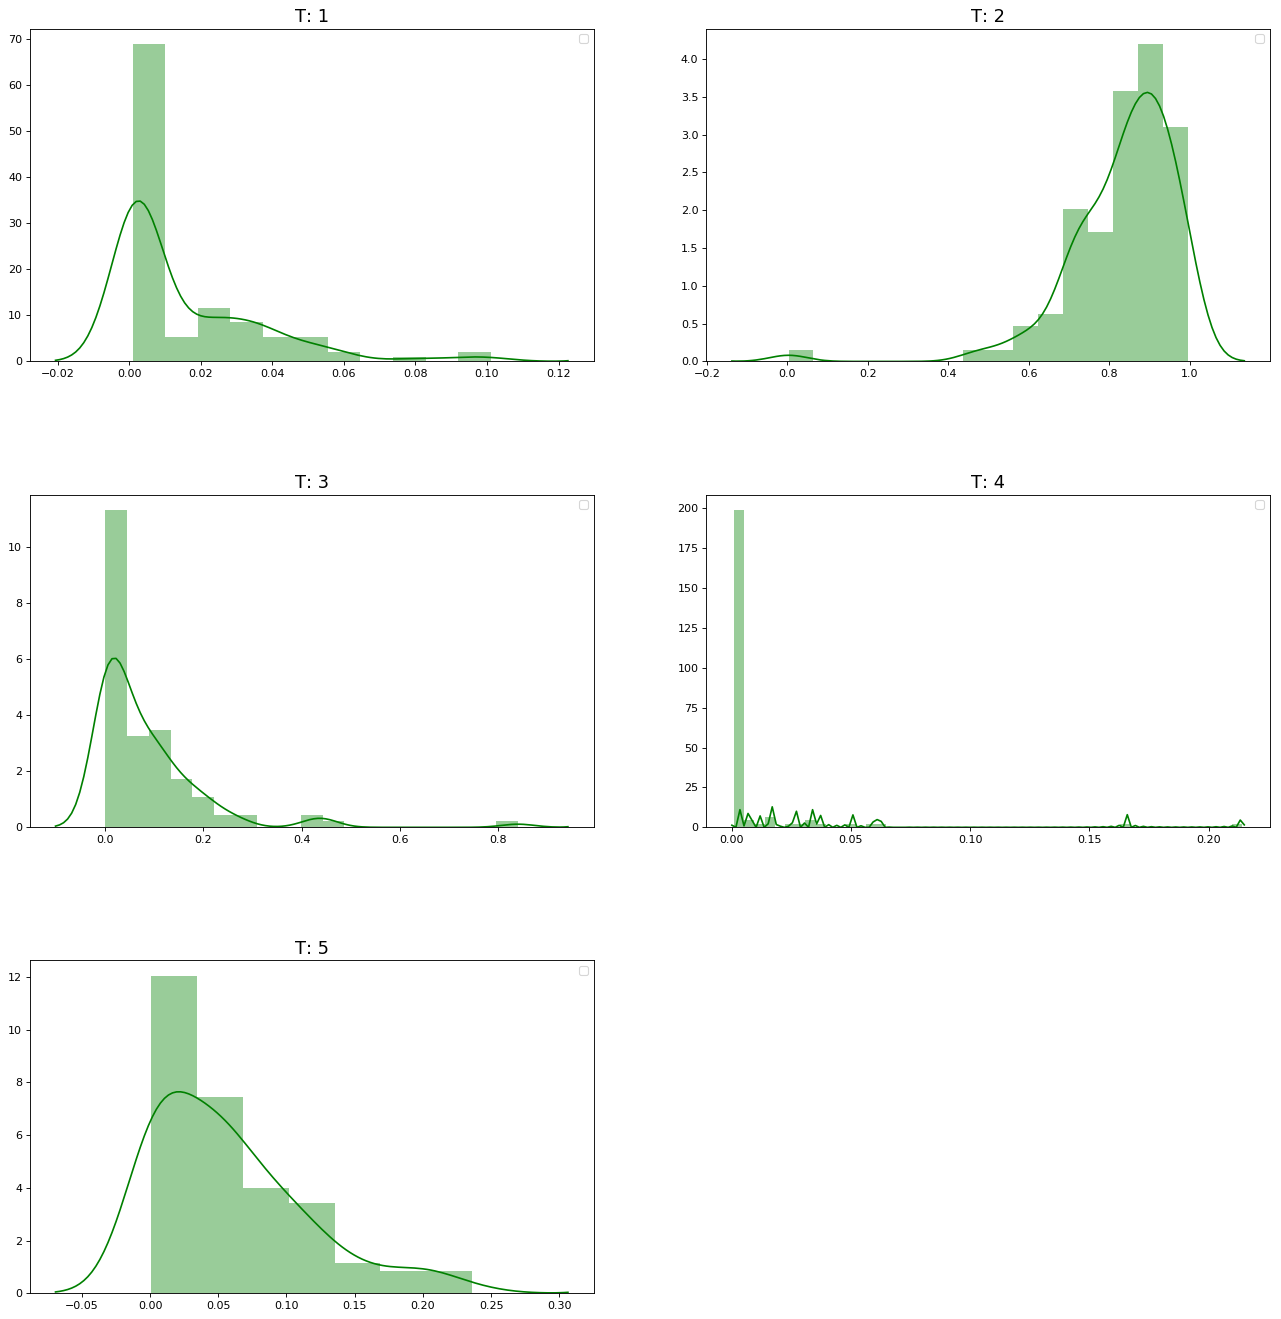

In [31]:
fig = plt.figure(figsize=(20, 800), dpi=80)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for index, variable in enumerate(df_deicide):
    ax = fig.add_subplot(len(df_deicide), 2, index + 1)
    sns.distplot(df_deicide[variable], axlabel=False, kde_kws={"label": variable}, color='green')
    ax.set_title('{}'.format(variable), size = 16)
    ax.legend([])